In [1]:
# All imports (TODO: Add appropriate packages if necessary)
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from utils import *

%reload_ext autoreload
%autoreload 2

# Load data
x0 = np.loadtxt('../../data/nonlinear_vectorfield_data_x0.txt')
x1 = np.loadtxt('../../data/nonlinear_vectorfield_data_x1.txt')

### TODO: Part 1 - Estimate the vector field with a linear operator and compute mean squared error to the solution after $\Delta t$

In [2]:
delta_T = 0.01

v = (x1-x0)/delta_T

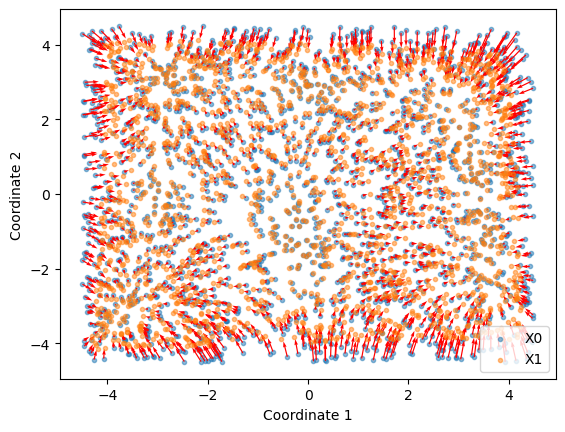

In [22]:
plt.scatter(x0[:,0],x0[:,1], label = 'X0', alpha= 0.5, marker= '.')
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r')
plt.scatter(x1[:,0], x1[:,1], label = 'X1', alpha=0.5, marker= '.')
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.legend()

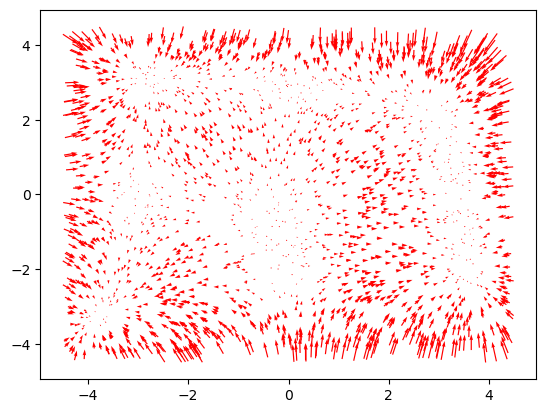

In [7]:
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r')

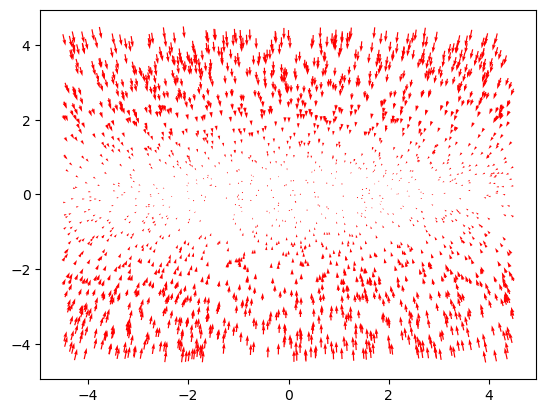

In [15]:
A_estim = least_squares(x0,v)[0:2,0:2]
approx = x0@A_estim
plt.quiver(x0[:,0], x0[:,1], approx[:,0], approx[:,1], color= 'r')

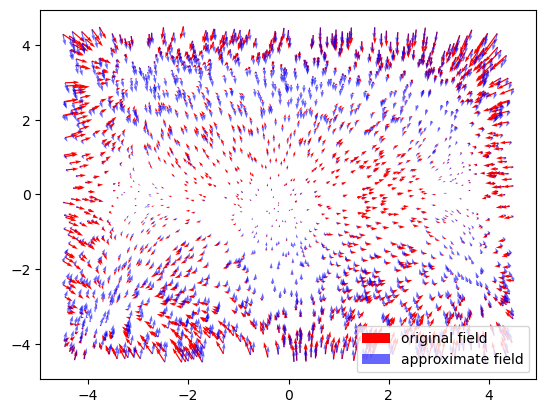

In [16]:
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r', label= 'original field')
plt.quiver(x0[:,0], x0[:,1], approx[:,0], approx[:,1], color= 'b', alpha= 0.6, label ='approximate field')
plt.legend()

In [17]:
A_estim

array([[-1.00061009,  0.0968975 ],
       [-0.02703414, -4.34400169]])

In [18]:
def f(t, y):
    return np.dot(y, A_estim)

In [23]:
approx_x1 = x1_estim(f,x0, delta_T)
mean_squared_error(x1, approx_x1)

0.03727402253833971

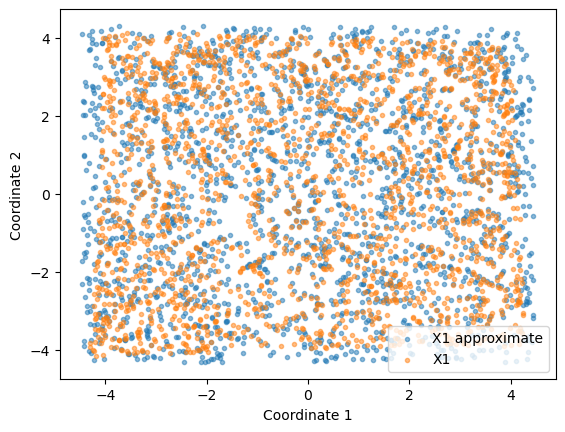

In [24]:
plt.scatter(approx_x1[:,0],approx_x1[:,1], label = 'X1 approximate', alpha= 0.5, marker='.')
plt.scatter(x1[:,0], x1[:,1], label = 'X1', alpha=0.5, marker= '.')
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.legend()

### TODO: Part 2 - Approximate the vector field with RBF and compute mean squared error to the solution after $\Delta t$

In [32]:
L = 500
phi_1 = approx_non_linear_function(x0[:,0:1],x1[:,0:1],L,0.08)
approx_x1_1 = transform(phi_1.T, least_squares(phi_1.T, x1))
phi_2 = approx_non_linear_function(x0[:,1:2],x1[:,1:2],L,0.08)
approx_x1_2 = transform(phi_2.T, least_squares(phi_2.T, x1))

updated
updated


In [38]:
approx_x1_cheat = built_int_interpolator(x0,x1,0.9)

In [39]:
approx_x1_cheat

array([[-0.79317047,  2.09824399],
       [-4.20066664, -1.95521799],
       [-3.32344612, -3.54971686],
       ...,
       [ 3.93738019,  1.83673139],
       [-1.79152989, -3.59123552],
       [ 0.7883628 ,  2.17869974]])

In [40]:
x1

array([[-0.79317039,  2.09824395],
       [-4.20066645, -1.95521799],
       [-3.32344627, -3.54971712],
       ...,
       [ 3.93738073,  1.83673157],
       [-1.79153043, -3.59123607],
       [ 0.78836138,  2.17869936]])

In [41]:
mean_squared_error(x1, approx_x1_cheat)

8.560895640456554e-13

In [ ]:
approx_vector_field =

### TODO: Part 3 - Analysis of the system